# Lineare Regression mit realen Daten

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

## Schritt 1: Daten sammeln (hier einlesen)

In [2]:
data=pd.read_csv("car_data.csv")

In [3]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
data.shape

(4340, 8)

## Schritt 2: Daten aufbereiten

In [5]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [6]:
data.drop(['name'],axis=1,inplace=True)

In [7]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [8]:
data.shape

(4340, 7)

In [9]:
print("Year unique: ", data["year"].unique())

Year unique:  [2007 2012 2017 2014 2016 2015 2018 2019 2013 2011 2010 2009 2006 1996
 2005 2008 2004 1998 2003 2002 2020 2000 1999 2001 1995 1997 1992]


<AxesSubplot:xlabel='year', ylabel='count'>

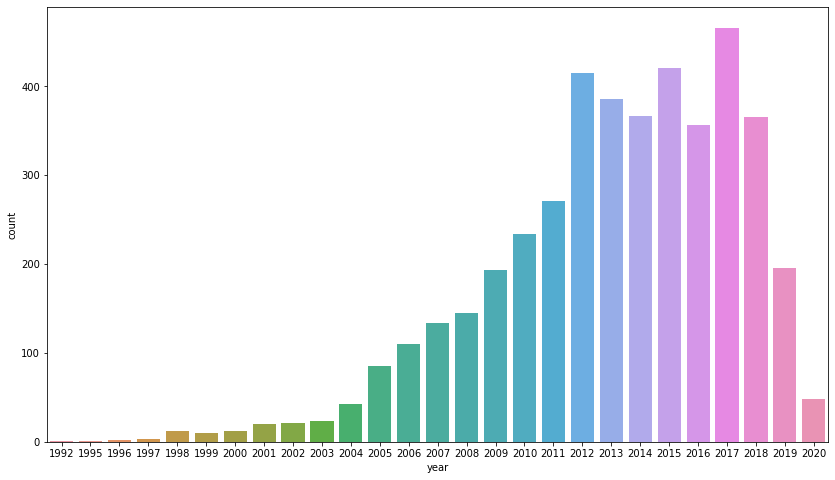

In [10]:
plt.figure(figsize=(14,8))
sns.countplot(x=data['year'])

In [11]:
data['current_year'] = 2022
data['age']=data['current_year']-data['year']

In [12]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,age
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2022,15
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2022,15
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2022,10
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2022,5
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2022,8


In [13]:
data.drop(['year','current_year'],axis=1,inplace=True)
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


In [14]:
print("Fuel unique: ", data["fuel"].unique())
print("Seller unique: ", data["seller_type"].unique())
print("Transmission: ", data["transmission"].unique())
print("Owner: ", data["owner"].unique())

Fuel unique:  ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
Seller unique:  ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission:  ['Manual' 'Automatic']
Owner:  ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


<AxesSubplot:xlabel='fuel', ylabel='selling_price'>

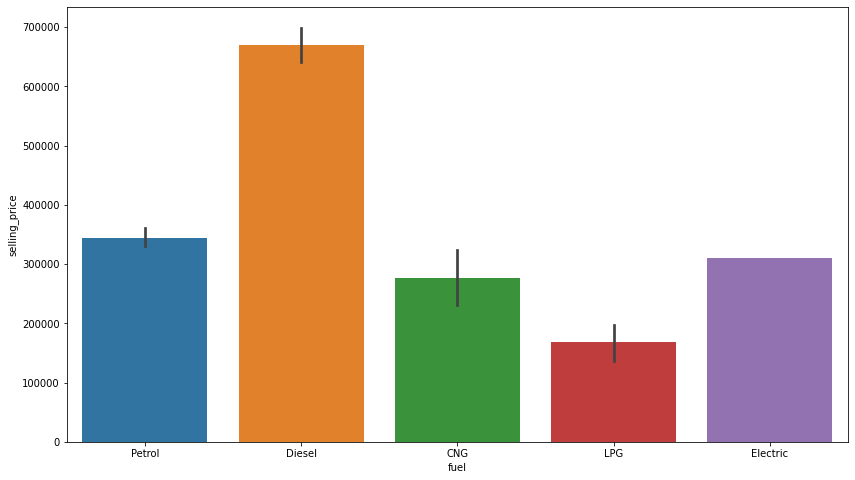

In [15]:
plt.figure(figsize=(14,8))
sns.barplot(x=data['fuel'], y=data['selling_price'])

In [16]:
data.loc[data['fuel'] == 'Electric']

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
4145,310000,62000,Electric,Dealer,Automatic,Second Owner,16


<AxesSubplot:xlabel='fuel', ylabel='count'>

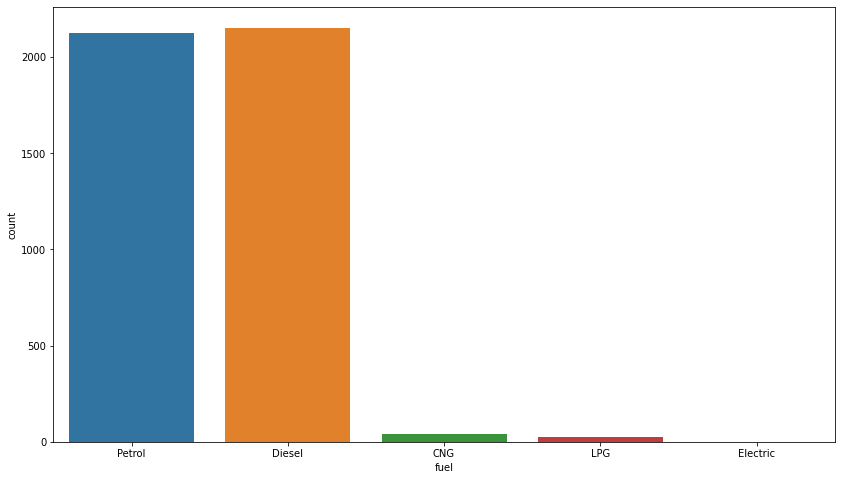

In [17]:
plt.figure(figsize=(14,8))
sns.countplot(x=data['fuel'])

In [18]:
# fuel
data['fuel'] = data['fuel'].map({
    'LPG':0,
    'CNG':1,
    'Electric': 2,
    'Petrol': 3,
    'Diesel': 4
})

# seller_type
data['seller_type'] = data['seller_type'].map({
    'Individual': 0,
    'Dealer': 1,
    'Trustmark Dealer': 2
})

# transmission
data['transmission'] = data['transmission'].map({
    'Manual': 0,
    'Automatic': 1
})

# owner
data['owner'] = data['owner'].map({
    'Test Drive Car': 0,
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4
})

In [19]:
data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,3,0,0,1,15
1,135000,50000,3,0,0,1,15
2,600000,100000,4,0,0,1,10
3,250000,46000,3,0,0,1,5
4,450000,141000,4,0,0,2,8


In [20]:
min_max = MinMaxScaler()
data_scaled=pd.DataFrame(min_max.fit_transform(data), columns=data.columns)

data_scaled.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,0.004505,0.086783,0.75,0.0,0.0,0.25,0.464286
1,0.012950,0.061988,0.75,0.0,0.0,0.25,0.464286
2,0.065315,0.123976,1.00,0.0,0.0,0.25,0.285714
3,0.025901,0.057028,0.75,0.0,0.0,0.25,0.107143
4,0.048423,0.174807,1.00,0.0,0.0,0.50,0.214286


In [21]:
# Shuffle data 
data_scaled = data_scaled.sample(frac=1).reset_index(drop=True)

data_scaled.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,0.048423,0.074385,0.75,0.0,1.0,0.75,0.321429
1,0.163851,0.014504,0.75,0.5,1.0,0.25,0.071429
2,0.025901,0.123976,1.00,0.0,0.0,1.00,0.428571
3,0.025901,0.148772,0.75,0.0,0.0,0.50,0.464286
4,0.076577,0.043391,1.00,0.0,0.0,0.25,0.107143


In [22]:
# Aufteilung in Traings- und Testdaten (80:20)
training_data = data_scaled.sample(frac=0.8,random_state=1)
test_data = data_scaled.drop(training_data.index)

## Schritt 3: Model trainieren

In [23]:
kf = KFold(n_splits=10)

lin_reg_models = []
val_indexes = []
for train_index, val_index in kf.split(training_data):
    model = LinearRegression().fit(training_data.iloc[train_index, 1:], training_data.iloc[train_index, 0])

    lin_reg_models.append(model)
    val_indexes.append(val_index)

## Schritt 4: Model auswerten

In [24]:
i=0
for model, val_index in zip(lin_reg_models, val_indexes):
    print("Iteration", i, "Score:", model.score(training_data.iloc[val_index, 1:], training_data.iloc[val_index, 0]))
    i=i+1
    

Iteration 0 Score: 0.416008316020436
Iteration 1 Score: 0.43241342281874473
Iteration 2 Score: 0.5156728937752582
Iteration 3 Score: 0.4775924144693916
Iteration 4 Score: 0.40865928570295373
Iteration 5 Score: 0.3545866270553266
Iteration 6 Score: 0.5754391345927237
Iteration 7 Score: 0.4560217495094713
Iteration 8 Score: 0.3484345113327195
Iteration 9 Score: 0.4757466108031234


## Schritt 5: Parametertuning

Wird in diesem Beispiel übersprungen.

## Schritt 6: Testdaten

In [25]:
final_model = LinearRegression().fit(training_data.iloc[:, 1:], training_data.iloc[:, 0])

print("Score:", final_model.score(test_data.iloc[:, 1:], test_data.iloc[:, 0]))

Score: 0.45865333249779194
